# Reading the Web Page into Python

In [1]:
import requests
import pandas as pd
import numpy as np
import statsmodels.api as sm

# url with data
r = requests.get('https://www.lotteryusa.com/georgia/fantasy-5/year')


In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

In [3]:
# Get table data and load in a pandas data frame

table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]

In [4]:
# Remove all rows with nulls
df.dropna(inplace=True)

In [5]:
df.head()

,Date,Result,Jackpot
0,"Tue, Sep 18, 2018",1 9 10 17 40,"$150,000"
1,"Mon, Sep 17, 2018",12 20 23 28 33,"$125,000"
3,"Sun, Sep 16, 2018",8 26 31 33 37,"$150,000"
4,"Sat, Sep 15, 2018",8 15 18 28 41,"$125,000"
5,"Fri, Sep 14, 2018",1 5 9 23 29,"$659,000"


In [6]:
# Remove the 'Date' and "Jackpot" columns
df.drop(['Jackpot'], axis=1, inplace= True)

In [7]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
# Set Date column as index
#df = df.set_index('Date', append=False)

In [8]:
# Remove row index name
#df.index.name = 'Date'


In [9]:
# Expand 'Result' Column into multiple columns
df = df.join(df['Result'].str.split(' ', expand=True).add_prefix('Digit'))

In [10]:
# Remove the 'Result' columns
df.drop(['Result'], axis=1, inplace= True)

In [11]:
df.head()

,Date,Digit0,Digit1,Digit2,Digit3,Digit4
0,2018-09-18,1,9,10,17,40
1,2018-09-17,12,20,23,28,33
3,2018-09-16,8,26,31,33,37
4,2018-09-15,8,15,18,28,41
5,2018-09-14,1,5,9,23,29


In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Convert columns from objects to integers

In [13]:
df['Digit0'] = df['Digit0'].astype(str).astype(int)

In [14]:
df['Digit1'] = df['Digit1'].astype(str).astype(int)

In [15]:
df['Digit2'] = df['Digit2'].astype(str).astype(int)

In [16]:
df['Digit3'] = df['Digit3'].astype(str).astype(int)

In [17]:
df['Digit4'] = df['Digit4'].astype(str).astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 366
Data columns (total 6 columns):
Date      365 non-null datetime64[ns]
Digit0    365 non-null int64
Digit1    365 non-null int64
Digit2    365 non-null int64
Digit3    365 non-null int64
Digit4    365 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 30.0 KB


In [19]:
column_1 = df.iloc[:,0]
#pd.DataFrame({"dayofyear": column_1.dt.dayofyear})
df['DayOfYear']= pd.DataFrame(column_1.dt.dayofyear)
df['Year']= pd.DataFrame(column_1.dt.year)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 366
Data columns (total 7 columns):
Date             365 non-null datetime64[ns]
YearDayOfYear    365 non-null int64
Digit0           365 non-null int64
Digit1           365 non-null int64
Digit2           365 non-null int64
Digit3           365 non-null int64
Digit4           365 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 32.8 KB


In [21]:
# Concatenate columns df[['Year'+ 'DayOfYear']]
df['YearDayOfYear']=df['Year'].astype(str)+df['DayOfYear'].astype(str)

In [26]:
# Convert 'YearDayOfYear' to a integer
df['YearDayOfYear'] = df['YearDayOfYear'].astype(str).astype(int)

In [23]:
# Move 'YearDayOfYear' column to 2nd column
col_reorder=['Date', 'YearDayOfYear','Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']
df=df.reindex(columns=col_reorder)

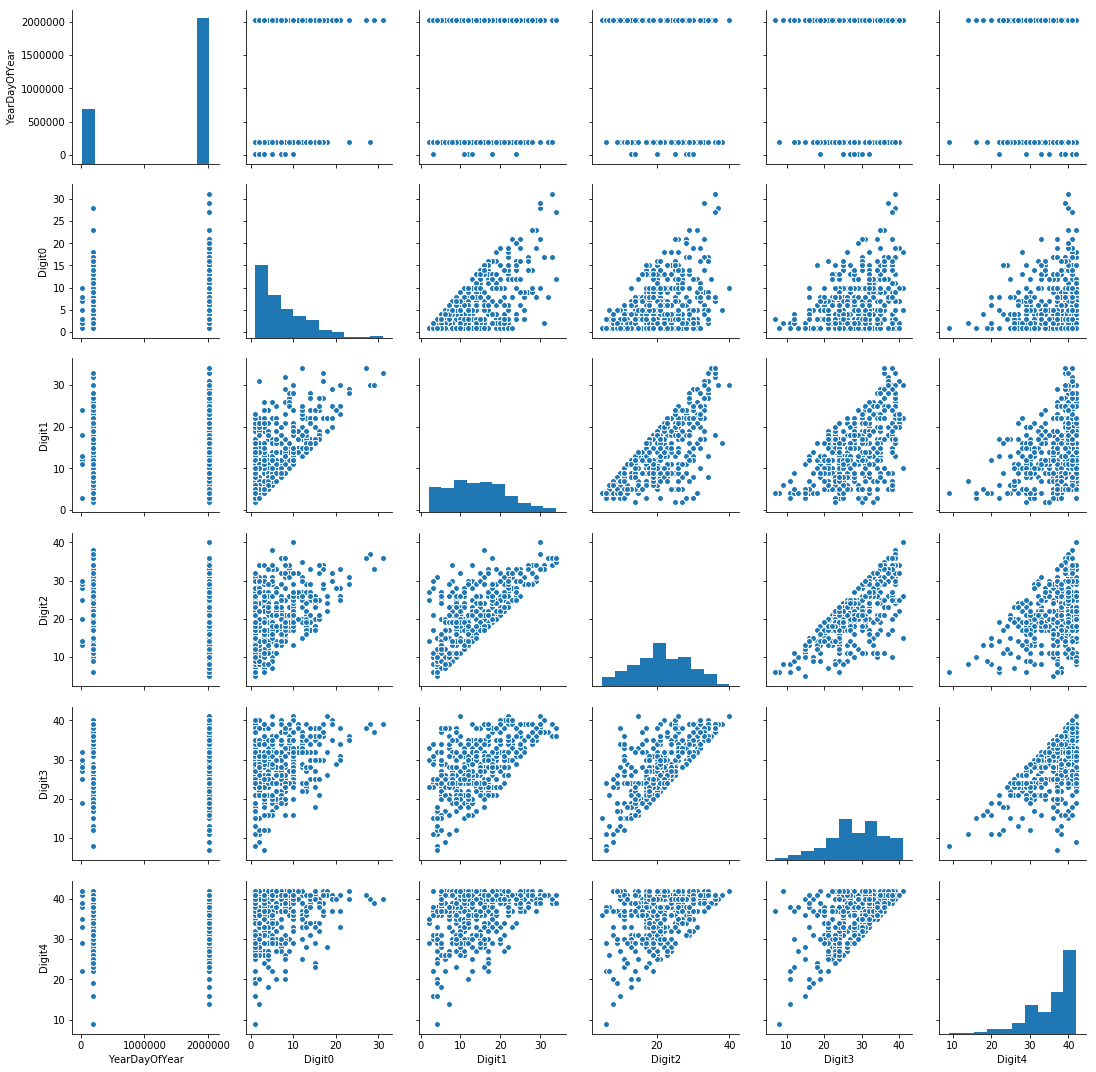

In [29]:
sns.pairplot(df)

In [ ]:
#stack digit columns to get total value counts
NumProbabilities= df[:16][['Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']].stack().value_counts(normalize=True) *100

In [ ]:
NumProbabilities

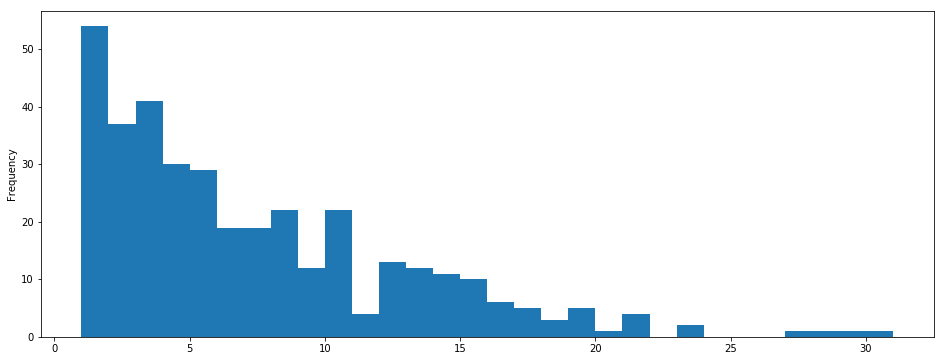

In [38]:
df['Digit0'].plot(kind ='hist' , x='Digit0', figsize=(16,6), bins=30)
#plt.subplot(df['Digit0'])
#plt.xlabel("Day")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))

Text(0.5,0,'Digit1')

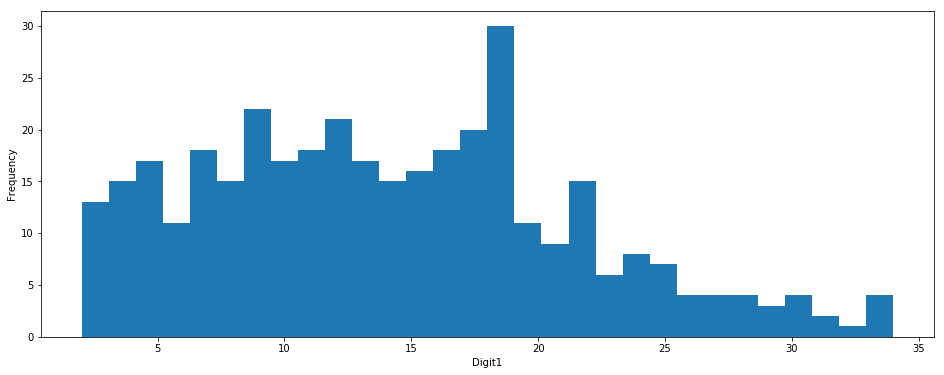

In [39]:
df['Digit1'].plot(kind ='hist' , x='Digit1', figsize=(16,6), bins=30)
#plt.subplot(df['Digit0'])
plt.xlabel("Digit1")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))

count    365.000000
mean      21.271233
std        7.297476
min        5.000000
25%       17.000000
50%       21.000000
75%       26.000000
max       40.000000
Name: Digit2, dtype: float64

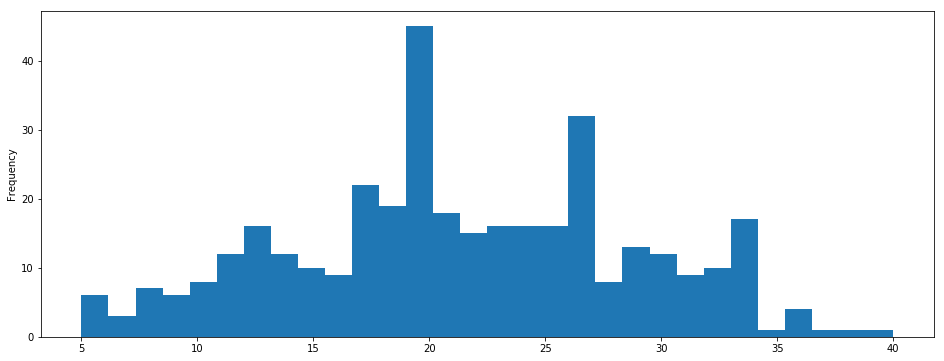

In [32]:
df['Digit2'].plot(kind ='hist' , x='Digit2', figsize=(16,6), bins=30)
#plt.subplot(df['Digit0'])
#plt.xlabel("Day")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))
df['Digit2'].describe()

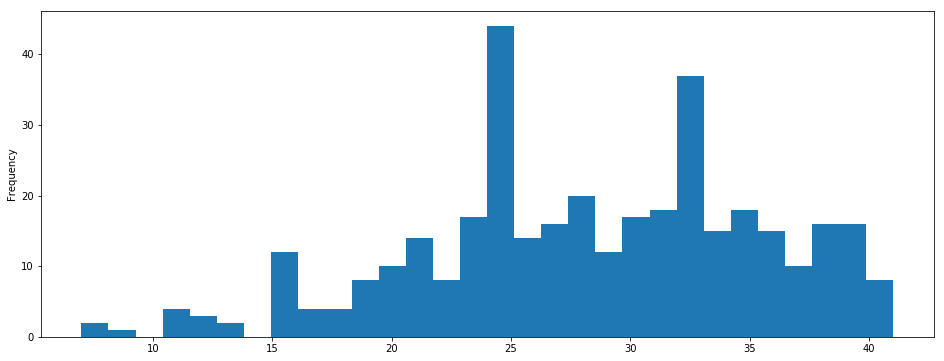

In [33]:
df['Digit3'].plot(kind ='hist' , x='Digit3', figsize=(16,6), bins=30)
#plt.subplot(df['Digit0'])
#plt.xlabel("Day")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))

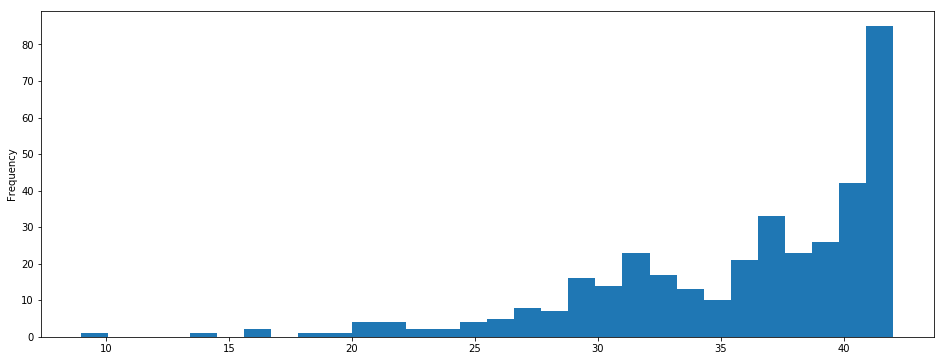

In [34]:
df['Digit4'].plot(kind ='hist' , x='Digit4', figsize=(16,6), bins=30)
#plt.subplot(df['Digit0'])
#plt.xlabel("Day")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))